# Presentation follow along

In [1]:
from sklearn.datasets import load_digits
data = load_digits(as_frame=True).frame
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [2]:
# use .loc[] to get the first row
# then use .values to get this row as a pure array
# then take [:-1], meaning everything up to the last value
# becuase the last value is the label

row = data.loc[0].values[:-1]

# then reshape into a grid
grid = row.reshape(8, 8)

print(grid)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


<IPython.core.display.Javascript object>


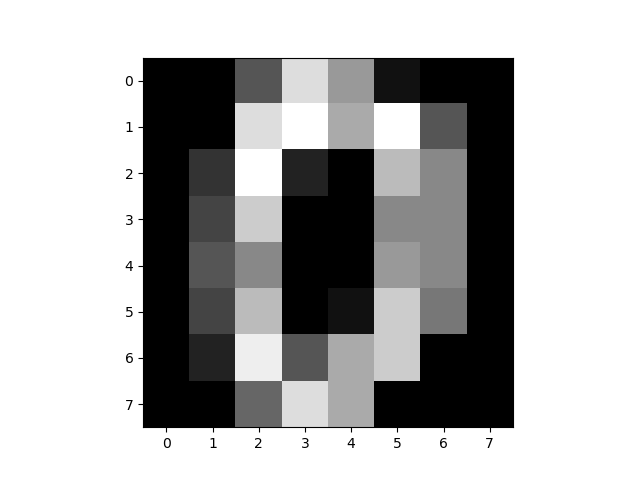

In [3]:
import matplotlib.pyplot as plt

%matplotlib notebook

plt.figure()
plt.imshow(grid, cmap='gray')

In [4]:
def show_digit(row_number):
    
    row = data.loc[row_number].values[:-1]
    label = data.loc[row_number].values[-1]
    grid = row.reshape(8, 8)
    
    plt.figure()
    plt.imshow(grid, cmap='gray')
    plt.title('Label = ' + str(int(label)))

<IPython.core.display.Javascript object>


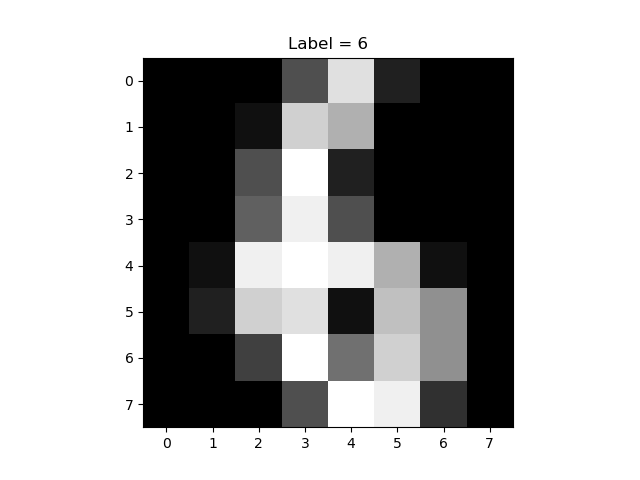

In [5]:
show_digit(34)

In [6]:
# import the svm algorithm from scikit-learn
from sklearn.svm import SVC

# import train test split
from sklearn.model_selection import train_test_split

# perform train test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=37)

# create a new classifier. C=1 here sets the "wigglyness"
classifier = SVC(C=1)

# fit the classifier on the training data
classifier.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

# make a prediction on the test data
prediction = classifier.predict(test_data.iloc[:, :-1])

In [7]:
print(sum(prediction == test_data.iloc[:, -1]) / len(prediction))

0.9944444444444445


In [8]:
fails = test_data[prediction != test_data.iloc[:, -1]]
fails

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1628,0.0,0.0,5.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,1.0,0.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5


<IPython.core.display.Javascript object>


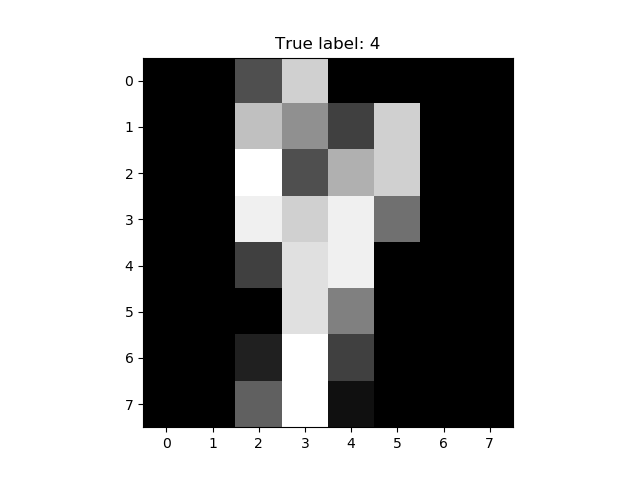

Text(0.5, 1.0, 'True label: 4')

In [9]:
plt.figure()
plt.imshow(fails.iloc[0, :-1].values.reshape(8, 8), cmap='gray')
plt.title('True label: 4')

<IPython.core.display.Javascript object>


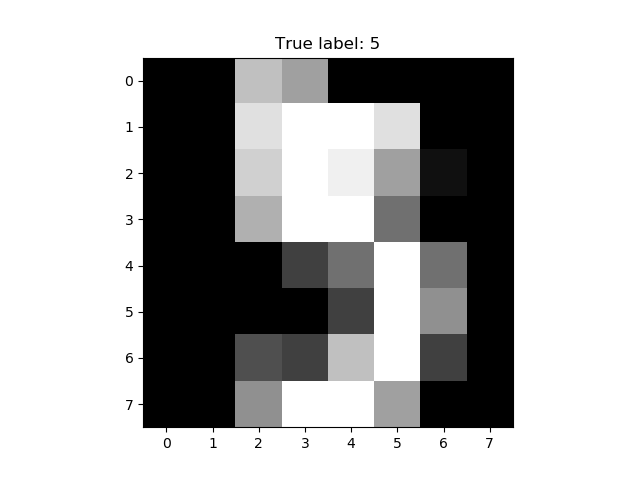

Text(0.5, 1.0, 'True label: 5')

In [10]:
plt.figure()
plt.imshow(fails.iloc[1, :-1].values.reshape(8, 8), cmap='gray')
plt.title('True label: 5')

In [11]:
predicted = prediction[prediction != test_data.iloc[:, -1]]
print(predicted)

[9 9]


In [12]:
# import the KFold function
from sklearn.model_selection import KFold

# make a k-fold iterator with 5 splits, shuffling the data
kf = KFold(n_splits=5, shuffle=True)

# perform 5 loops, getting random rows
for train_index, test_index in kf.split(data):
    
    X_train = data.iloc[train_index, :-1]
    X_test = data.iloc[test_index, :-1]
    
    y_train = data.iloc[train_index, -1]
    y_test = data.iloc[test_index, -1]
    
    classifier = SVC(C=1)
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    
    print(sum(prediction == y_test) / len(prediction))

0.9833333333333333
0.9916666666666667
0.9832869080779945
0.9888579387186629
0.9888579387186629


In [13]:
sum([0.99166, 0.99444, 0.98050, 0.98328, 0.98607]) / 5


0.98719